# 1: Logic in Python

<img alt="xkcd automation" align="right" style="width:40%" src="https://imgs.xkcd.com/comics/automation.png">

One of the main goals of programming is to automate things. The main reasons for this are:

1. Doing dull things manually is boring and you, a highly trained scientist, should be doing 
   something more worthwhile than moving decimal points in spreadsheets;
2. Reproducibility: someone should be able to take what you hae done and re-do it, without
   your "fudging". The more your "expert opinion" is used to generate a result, the less
   trust-worthy that result is.
3. Safety: you will cock something up (likely many things, that is what learning is about)
   while doing your science; if you write a program to do the thing, and write it well, you
   should just have to make minor adjustments to fix the issue and re-run it, rather than
   having to re-do all the boring work (see 1).
   
Sometimes automation takes ages... you will learn at some point (or not in my case) what the
most efficient use of your time is (see comic).
   
To be able to automate things, you need to understand some basic computer logic.  These concepts
are pretty much universal.  In this notebook we will introduce:

1. For loops
2. If/else statements
3. While loops
4. Sorting lists

We will also showcase some nicities/nuances that Python has for these.

# Looping

There are two main ways to loop in Python, `for` loops and `while` loops.  You will likely find yourself using
`for` loops more-often than `while` loops, but we will introduce both. the main difference is that `for` loops
iterate through a range of variables, whereas `while` loops operate repeatedly until some condition is met.
We will talk about conditions in the `if`/`else` section, before getting onto `while` loops.

The following two loops are equivelant, but the `for` loop is more expressive and usually safer (`while` loops
are the cause of many infinite loops...):

In [1]:
for i in range(5):
    print(i)

0
1
2
3
4


In [2]:
i = 0
while i < 5:
    print(i)
    i += 1

0
1
2
3
4


## `for` loops

`for` loops allow us to iterate through some *iterable*. Often this *iterable* is a `list`, but it doesn't have to be
(the `range` function above creates a `range` object, which is a type of [sequence](https://docs.python.org/3/library/stdtypes.html#typesseq)).

If we have any `list` an we want to apply the same process to every element in that list we can use a `for` loop (there are better/faster
ways to do this for numeric types using **numpy**, and we will showcase those in the [numpy](4-Numpy-introduction.ipynb) notebook).

In Python, `for` loops start with:
```python
for variable in iterable:
    do_something
```
where `variable` is a newly defined variable that equates to each element of the `iterable` in turn. At the end of the loop
`variable` will be the value of `iterable[-1]`. `iterable` is something that can be iterated over.  The `for` and `in` are
Python *keywords* that Python knows how to interpret. The colon (`:`) at the end of the `for` line shows that that statement
has finished.

All the statements that should be implemented within the loop **must** be indented, this indentation *should* be 4 spaces
(not a tab).  

**Never mix tabs and spaces!**  

When the indentation ends, the loop ends.

For example, say we wanted to make a list of word lengths for a given sentence:

In [4]:
sentence = "Monty Python and the Holy Grail"
words = sentence.split(" ")

word_lengths = []  # Define an empty list that we will append to
for word in words:
    word_length = len(word)
    print(f"{word} is {word_length} char long")
    word_lengths.append(word_length)

print(word_lengths)

Monty is 5 char long
Python is 6 char long
and is 3 char long
the is 3 char long
Holy is 4 char long
Grail is 5 char long
[5, 6, 3, 3, 4, 5]


Lets play with some real data.  In the data directory (directory is a unix-y word for a folder) there is a text-file containing
the ground accelerations measured in [Wellington](https://www.geonet.org.nz/data/network/sensor/WEL)
during the Kaikoura earthquake.  I downloaded these data and manipulated them
using Python tools (those doing GPHS445 will learn these tools soon) and formatted them into a simple text-file.  We will:

0. Open this file
1. Read this file using a for loop
2. Work out the average acceleration
3. Remove the average acceleration from all values
4. Plot the results (note more plotting is to come, so we will skim over the details here).

This example is not Python best-practice, and if you find yourself using time-series data like this, Numpy will
be your friend.  We will show some different examples of similar things in the [numpy](4-Numpy-introduction.ipynb)
notebook.

### 0: Opening files:

In Python, files are opened using the `open` function.  The syntax for this function is:
```python
open(filename, mode)
```
where `filename` is the file you want to open (note if the file is not in your current working directory, e.g. where you are,
then you will need to specify the full path to the file) and `mode` is how you want to open the file. The main ones we
will use are:

- `r` to open the file in read mode
- `w` to open the file in write mode, this allows you to write to the file
- `a` to open the file in append mode, this allows you to write more data to the end of the file

Our file is in the `data` directory, so we need to specify the path for it, and we want to open
in read mode:

In [45]:
open_file = open("data/Kaikoura_acceleration_in_wellington.txt", mode="r")
print(open_file)

<_io.TextIOWrapper name='data/Kaikoura_acceleration_in_wellington.txt' mode='r' encoding='UTF-8'>


### 1: Reading data from the file

Once we have an open file, we can iterate through the lines in the file using a for loop:

In [46]:
accelerations = []  # Note that these are in m/s^2
for line in open_file:
    accelerations.append(float(line))  # We need to convert the strings read in to floats

print(f"Read in {len(accelerations)} samples")
print(accelerations[0:10])

# Note, if you re-run this then you will not be returned anything, you need to return to the
# start of the file using `open_file.seek(0)`

Read in 1841 samples
[0.50074274, 0.49951969, 0.50078667, 0.49956336, 0.5008345, 0.4996077, 0.5008761, 0.49964785, 0.50091492, 0.4996899]


We should always close the file once you are done with it:

In [47]:
open_file.close()

A better way to do this is to use a *context-manager*, you don't need to know what this is, but a nice
rule to follow is to open files like the example below:

In [48]:
with open("data/Kaikoura_acceleration_in_wellington.txt", mode="r") as f:
    accelerations = []
    for line in f:
        accelerations.append(float(line))

print(f"Read in {len(accelerations)} samples")
print(accelerations[0:10])

Read in 1841 samples
[0.50074274, 0.49951969, 0.50078667, 0.49956336, 0.5008345, 0.4996077, 0.5008761, 0.49964785, 0.50091492, 0.4996899]


When you leave the context-manager (indicated by reducing the indent level to the same as the `with` statement) the file will
be closed for you.  This is simpler and safer, always good!

### 2: Finding the mean

We can loop through the list to calculate the sum, then divide by the length:

In [49]:
cumulative_acceleration = 0
for acceleration in accelerations:
    cumulative_acceleration += acceleration

print(f"Cumulative acceleration is {cumulative_acceleration} m/s^2")

mean_acceleration = cumulative_acceleration / len(accelerations)

print(f"Mean acceleration is {mean_acceleration} m/s^2")

Cumulative acceleration is 920.4865030700008 m/s^2
Mean acceleration is 0.4999926686963611 m/s^2


Note that this is not very efficient, but lists can be summed using a Python native function to speed things up a bit:

In [50]:
cumulative_acceleration = sum(accelerations)
mean_acceleration = cumulative_acceleration / len(accelerations)
print(f"Mean acceleration is {mean_acceleration} m/s^2")

Mean acceleration is 0.4999926686963611 m/s^2


### 3: Remving the mean

The mean is small, but we can still go through and remove it.  Again, we will use a `for` loop:

In [51]:
accelerations_demeaned = []
for acceleration in accelerations:
    accelerations_demeaned.append(acceleration - mean_acceleration)

Lets recalcuakte the mean to make sure it is now zero (or close to zero taking into account rounding errors):

In [52]:
cumulative_acceleration = sum(accelerations_demeaned)
mean_acceleration = cumulative_acceleration / len(accelerations_demeaned)
print(f"Mean acceleration is {mean_acceleration} m/s^2")

Mean acceleration is -4.3655103070404714e-16 m/s^2


This is pretty much as close to zero as we are going to get taking into account the precision of floating point numbers.

### Plotting our data

We will make a simple plot of acceleration against sample number using matplotlib.  Matplotlib is a plotting
package for Python, we will talk about it more in the [plotting](3-Basic-plotting.ipynb) notebook.

To access the functions in a package we need to import it.  Unlike Matlab, not all packages are imported
when you start Python; this makes Python faster to start, lighter and means that you don't run the risk of
having two functions with the same name being called wrongly.

We will follow the standard convention for importing matplotlib:

In [53]:
# To get plots to render in the notebook we need to include this "magic" line.
%matplotlib inline
import matplotlib.pyplot as plt  # This imports the matplotlib.pyplot package and renames it temporarily as plt

We can make simple plots using `plt.plot(x, y)`, first we need to make a range of x values, then use that:

Text(0, 0.5, 'Acceleration ($m/s^2$)')

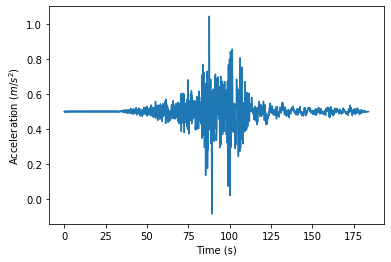

In [54]:
sampling_rate = 10.0  # This is the number of samples per second of the data.
times = []
for i in range(len(accelerations)):
    times.append(i / sampling_rate)

plt.plot(times, accelerations)
plt.xlabel("Time (s)")
plt.ylabel("Acceleration ($m/s^2$)")

To compare the two, we can plot both the demeaned data and the raw data on the same graph, using different colours:

Text(0, 0.5, 'Acceleration ($m/s^2$)')

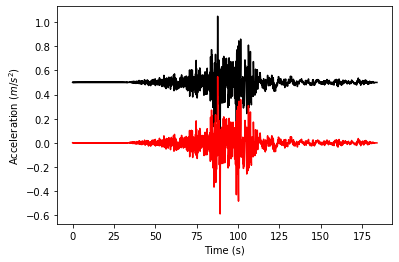

In [55]:
plt.plot(times, accelerations, color="black")
plt.plot(times, accelerations_demeaned, color="red")
plt.xlabel("Time (s)")
plt.ylabel("Acceleration ($m/s^2$)")

## Exercise:

Normalise the demeaned data such that the maximum amplitude = 1.  You can do this by dividing all values in the list by the
maximum amplitude.  Plot the resulting acceleration graph (time-series) with the non-normalised data plotted on top of it.

In [56]:
# Your answer here

# `if`/`else` conditions

Switches or conditional statements allow a programmer to control the flow of a program, and react to events.

The basic syntax of conditional statements in Python is:

```python
if condition:
    do_something()
elif another_condition:
    do_something_else()
else:
    do_anything()
```

As usual, indentation is used to show the start and end of sections of code, and colons are used to show the
end of a statement.  The three keywords here, `if`, `elif` and `else` do the following:
- `if` evaluates whether `condition` is `True`, and runs the section of code indented beneath 
   it (`do_somtheting()`) if `condition` is `True`;
- `elif` is evaluated if `condition` is `False`. This is a second `if` conditional that evaluates
  whether `another_condition` is `True`. The function `do_somthing_else` is only run if
  `condition` is `False` and `another_condition` is `True`.
- `else` catches any cases where the previous `if` statements evaluated to False. `do_anything` is
  run when both `condition` and `another_condition` are `False`.
  
This is a little confusing to write, so it probably doesn't make much sense to read! Lets have a look at
an example.  First note that mathematical conditions work in Python:
- `a == b` is `True` when the values of `a` and `b` are the same
- `a < b` is `True` when the value of `a` is less than the value of `b`
- ... The expected things happen for `>`, `>=` and `<=`. These symbols are known as *comparison operators* in Python.

In [65]:
a = 5

# This is a pretty dumb example! But we will do some more fun things in a minute
if a < 5:
    print("That is a small number, less than 5")
elif a > 5:
    print("That is a larger number, greater than 5")
else:
    print("Your number must be equal to 5!")

Your number must be equal to 5!


The logic of this toy example is to first check if the number assigned to the variable *a* is less than 5, it isn't, so 
the second, `elif` statement is evaluated to see if a is greater than 5. It isn't so the final `else` statement is run.

We can combine loops and conditional statements to extract information from lists.  We will work out when our acceleration
time-series rises above 0.5 m/s^2.  First we will read back in the data, just in case you tampered with the in-memory
representation:

In [71]:
with open("data/Kaikoura_acceleration_in_wellington.txt", mode="r") as f:
    accelerations = []
    for line in f:
        accelerations.append(float(line))

mean_acceleration = sum(accelerations) / len(accelerations)
demeaned_acceleration = []
for acceleration in accelerations:
    demeaned_acceleration.append(acceleration - mean_acceleration)

Now we can set some threshold (we will use a variable here so that you can play around with this and get different results):

In [85]:
acceleration_threshold = 0.5

# the enumerate function allows us to iterate through a list 
# and get the index of the element (i in this case) at the same time.
for i, acceleration in enumerate(demeaned_acceleration):
    if acceleration > acceleration_threshold:
        print(f"Threshold exceeded at index {i} by value {acceleration}")
    elif acceleration < -1 * acceleration_threshold:
        print(f"Large negative acceleration found at index {i}, value: {acceleration}")
    # We aren't doing anything with the other values, so we don't need an else statement

Threshold exceeded at index 877 by value 0.5473739213036388
Large negative acceleration found at index 892, value: -0.5870554886963611


Lets work out the total time that the absolute acceleration was above 0.25 m/s^2 during the Kaikoura wavetrain:

In [86]:
acceleration_threshold = 0.25
sampling_rate = 10.0
cumulative_time = 0

for acceleration in demeaned_acceleration:
    if acceleration > acceleration_threshold:
        cumulative_time += 1
    elif acceleration < -1 * acceleration_threshold:
        cumulative_time += 1

cumulative_time /= sampling_rate
print(f"{cumulative_time}s with absolute acceleration above {acceleration_threshold} m/s^2")

1.9s with absolute acceleration above 0.25 m/s^2


This is slightly clumsy.  If we want the same result for two different conditions we can chain them together in an if statement
using an `or` conditional keyword. Lets re-write the above using a chained `if` statement:

In [87]:
acceleration_threshold = 0.25
sampling_rate = 10.0
cumulative_time = 0

for acceleration in demeaned_acceleration:
    if acceleration > acceleration_threshold or acceleration < -1 * acceleration_threshold:
        cumulative_time += 1

cumulative_time /= sampling_rate
print(f"{cumulative_time}s with absolute acceleration above {acceleration_threshold} m/s^2")

1.9s with absolute acceleration above 0.25 m/s^2


In this case there is actually a better way to get the sam result, using the `abs` built-in function to get the absolute value of
acceleration, without the need for the second `if` conditional:

In [88]:
acceleration_threshold = 0.25
sampling_rate = 10.0
cumulative_time = 0

for acceleration in demeaned_acceleration:
    # Note that acceleration is replaced with abs(acceleration)
    if abs(acceleration) > acceleration_threshold:
        cumulative_time += 1

cumulative_time /= sampling_rate
print(f"{cumulative_time}s with absolute acceleration above {acceleration_threshold} m/s^2")

1.9s with absolute acceleration above 0.25 m/s^2


As well as the `or` conditional keyword there are others:
- `and` for chaining conditions together, the total conditional will only evaluate to `True` if all conditions joined with `and` are met;
- `in` for testing if something is within another object, useful for checking if something is in a `list`;
- `is` tests whether something is the same as another thing, rather than just testing the value;
- `not` reverses any test.

Some examples:

In [89]:
a = 1
b = 3
c = 42

# Example of an or conditional
a > b or a > c

False

In [90]:
a > b or a < c

True

In [91]:
a > b and a < c

False

In [92]:
a < b and a < c

True

In [94]:
a < b and not a > c

True

In [95]:
d = [1, 4, 12]

a in d

True

In [96]:
c in d

False

# While loops:

While loops are helpful for iterating through some list until you reach some state, for example, if you want to find the first
instance of something in a list:

In [97]:
sentence = "The cat sat on the mat then jumped across the dog"
words = sentence.split(" ")
print(words)

i = 0
word = words[i]
while not word == "mat":
    i += 1
    word = words[i]
print(f"Found {word} at index {i}")

['The', 'cat', 'sat', 'on', 'the', 'mat', 'then', 'jumped', 'across', 'the', 'dog']
Found mat at index 5


Lets make a time-series of our data up to the point where we first get large accelerations.  We will start by reading the data in again in-case you
have changed the in-memory representation.

In [98]:
with open("data/Kaikoura_acceleration_in_wellington.txt", mode="r") as f:
    accelerations = []
    for line in f:
        accelerations.append(float(line))

mean_acceleration = sum(accelerations) / len(accelerations)
demeaned_acceleration = []
for acceleration in accelerations:
    demeaned_acceleration.append(acceleration - mean_acceleration)

In [100]:
acceleration_threshold = 0.25

initial_accelerations = []
i = 0
acceleration = demeaned_acceleration[0]
while acceleration <= acceleration_threshold:
    initial_accelerations.append(acceleration)
    i += 1
    acceleration = demeaned_acceleration[i]

Text(0, 0.5, 'Acceleration ($m/s^2$)')

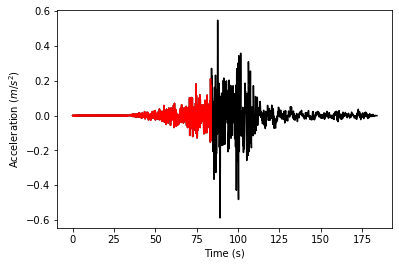

In [101]:
sampling_rate = 10.0
times = []

for i in range(len(demeaned_acceleration)):
    times.append(i / sampling_rate)

plt.plot(times, demeaned_acceleration, color="black")
plt.plot(times[0:len(initial_accelerations)], initial_accelerations, color="red")
plt.xlabel("Time (s)")
plt.ylabel("Acceleration ($m/s^2$)")